Adapted from http://scikit-learn.org/stable/modules/tree.html

In [1]:
from sklearn import tree

We define a few constants for passing and failing runs

In [2]:
PASS = +1
FAIL = -1


Here's the relation between input and result

In [3]:

samples = {
    "1 + 1": PASS,
    "2 * 2": FAIL,
    "2 + 2": PASS,
    "1 * 1": FAIL,
    "3 / 3": PASS
}


And here are the features we're looking for

In [4]:
features = ["1", "2", "3", "+", "-", "*", "/"]

We need to transform the presence of lexical items into a feature vector (with +1 for yes and -1 for no)

In [5]:
def shape(sample):
    x = []
    for f in features:
        if f in sample:
            x += [+1]
        else:
            x += [-1]
    return x

For instance, this is what we get for "1 + 1":

In [6]:
shape("1 + 1")

[1, -1, -1, 1, -1, -1, -1]

Now, let us create an input vector X and an output vector Y

In [7]:
X = []
Y = []
for key in samples.keys():
    X += [shape(key)]
    Y += [samples[key]]
X, Y

([[1, -1, -1, 1, -1, -1, -1],
  [-1, 1, -1, -1, -1, 1, -1],
  [-1, 1, -1, 1, -1, -1, -1],
  [1, -1, -1, -1, -1, 1, -1],
  [-1, -1, 1, -1, -1, -1, 1]],
 [1, -1, 1, 1, -1])

which we can now feed into a decision tree learner

In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [9]:
import graphviz
dot_data = tree.export
graph = graphviz.Source(dot_data)

This is the tree we get.  A decision like `* <= 0` means that `*` is not part of the input.

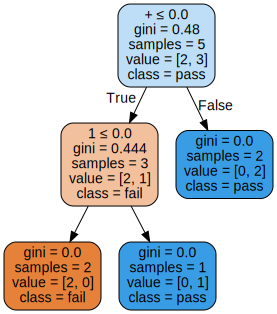

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         filled=True, rounded=True,
                         feature_names=features,
                                class_names=["fail", "pass"],
                                # impurity=False,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

We can even now use the tree to make predictions :-)

In [11]:
clf.predict([shape("2 * 2")])

array([-1])